In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import matplotlib.patches as patches

In [2]:
def true_nc(d):
    return (d/2) * np.log(0.5) - d/4

In [3]:
pk = np.load("Data/NC/Benchband/pk.npy")
pk_q = np.load("Data/NC/Benchband/pk_q.npy")

In [4]:
sig = np.linspace(0.5,4.0,200)

In [5]:
s_true = true_nc(3) * np.ones(sig.shape[0])
pk_q = pk_q[0] * np.ones(sig.shape[0])

In [6]:
def benchn_plot(N, pk, pk_q, save_path):

    fig, ax = plt.subplots(figsize=(8., 6.0))

    ax.set_ylim(-1.9, -1.7)

    colors = {
        "KMED": "#0072B2",
        "KMEDQ":  "#E69F00",   # orange
        "True": "black"
    }

    # --- Main curves ---
    ax.plot(N, pk,  label="KMED",
            linestyle="--", linewidth=2.2, color=colors["KMED"])

    ax.plot(N, pk_q,  label="KMED with quadratic kernel",
        linestyle="-.", linewidth=2.2, color=colors["KMEDQ"])

    ax.plot(N, s_true, label="True",
            linestyle="-", linewidth=2.4, color="black")

    ax.set_xlabel(r"$\sigma$", fontsize=12)
    ax.set_ylabel(r"$\log Z_{1}$", fontsize=12)

    ax.grid(True, linestyle="--", alpha=0.35)
    ax.tick_params(labelsize=10)
    ax.legend(frameon=False, fontsize=9)

    # -----------------------------------------------------
    # Inset placed slightly UP from bottom-right
    # -----------------------------------------------------
    ax_ins = inset_axes(
        ax,
        width="40%",        # inset size
        height="40%",
        loc="lower right",
        bbox_to_anchor=(0.0, 0.08, 1, 1),  # shift upward
        bbox_transform=ax.transAxes,
        borderpad=1.0
    )

    # Plot inside inset
    ax_ins.plot(N, pk, linestyle="--", linewidth=1.8, color=colors["KMED"])
    ax_ins.plot(N, s_true, linestyle="-", linewidth=2.0, color="black")

    # Zoom region
    k = 15
    ax_ins.set_xlim(N[0], N[k])
    ax_ins.set_ylim(min(pk[:k]) * 1.01, max(pk[:k]) * 1.01)

    ax_ins.grid(True, linestyle="--", alpha=0.3)
    ax_ins.tick_params(labelsize=7)

    # -----------------------------------------------------
    # Add a ZOOM ARROW (Nature-style)
    # -----------------------------------------------------
    # pick a nice representative point
    x0, y0 = N[2], pk[2]     # point in main plot
    x1, y1 = N[2], pk[2]     # same data point inside inset

    # transform coordinates into display coordinates for arrow
    start = ax.transData.transform((x0, y0))
    end   = ax_ins.transData.transform((x1, y1))

    # convert back to figure coordinates
    start_x, start_y = 0.05, 0.0      # <-- adjust if needed
    end_x,   end_y   = 0.5, 0.35      # <-- near the inset center

    arrow = patches.FancyArrowPatch(
        (start_x, start_y),
        (end_x, end_y),
        transform=ax.transAxes,
        arrowstyle="-|>",
        mutation_scale=12,
        linewidth=1.2,
        color="0.35"
    )

    ax.add_patch(arrow)

    fig.tight_layout()
    fig.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()


C:\Users\linfe\AppData\Local\Temp\ipykernel_8136\2593696377.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


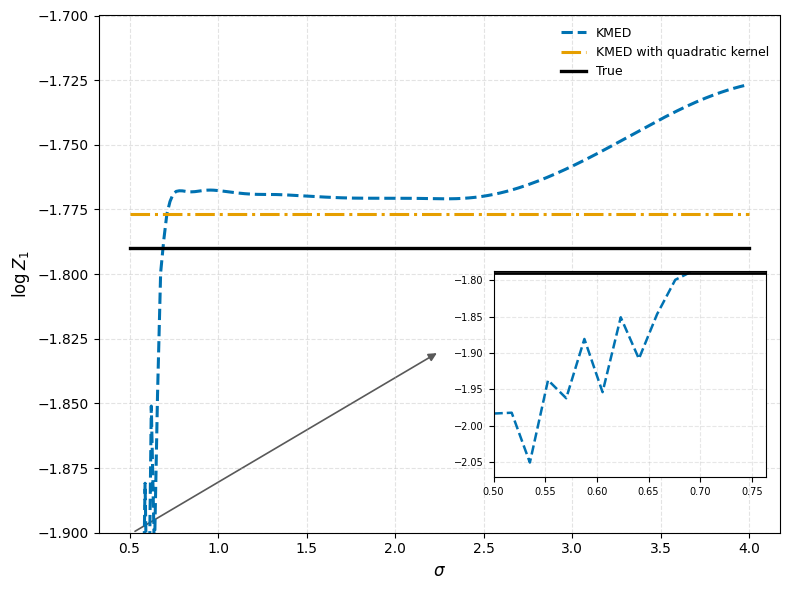

In [7]:
save_path = "Plots/NC/benchsig.png"
benchn_plot(sig, pk, pk_q, save_path)